In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [6]:
cwd = os.path.abspath('') 
cwd


'C:\\Users\\EK2394'

In [7]:
file = os.listdir(cwd)  

In [8]:
#df = pd.read_csv('sales/Sales_April_2019.csv')

In [9]:
files = [i for i in os.listdir('sales')]
files
all_months = pd.DataFrame()

In [10]:
for i in files:
    df = pd.read_csv('sales/'+i)
    all_months = pd.concat([all_months,df])
all_months.head()
      

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [11]:
all_months.to_csv('all_data.csv',index = False )

In [12]:
df = pd.read_csv('all_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


Data Cleaning

In [13]:
df.isnull()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
186845,False,False,False,False,False,False
186846,False,False,False,False,False,False
186847,False,False,False,False,False,False
186848,False,False,False,False,False,False


In [14]:
df.shape

(186850, 6)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [16]:
df['Order Date'] = pd.to_datetime(df['Order Date'],errors = 'coerce')

C:\Users\EK2394\AppData\Local\Temp\ipykernel_31224\2573401172.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'],errors = 'coerce')


In [17]:
print(df['Order Date'].isna().sum())  # Check how many NaT values you have

900


In [18]:
df['Month'] = df['Order Date'].dt.month_name()
df['Month']

0             April
1               NaN
2             April
3             April
4             April
            ...    
186845    September
186846    September
186847    September
186848    September
186849    September
Name: Month, Length: 186850, dtype: object

In [19]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April
1,NaN,NaN,NaN,NaN,NaT,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April


In [20]:
#df.drop('Month name',inplace = True,axis = 1)

In [21]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April
1,NaN,NaN,NaN,NaN,NaT,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April


In [22]:
null = df[df.isna()]
df = df.dropna(how = 'all')

In [25]:
print(df['Quantity Ordered'].unique())  # Show unique values to identify problematic entries


['2' '1' '3' '5' 'Quantity Ordered' '4' '7' '6' '8' '9']


In [26]:
df = df[pd.to_numeric(df['Quantity Ordered'], errors='coerce').notna()]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April
3,176560,Google Phone,1,600,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",September
186846,259354,iPhone,1,700,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",September
186847,259355,iPhone,1,700,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",September
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",September


In [27]:
df['Quantity Ordered']=df['Quantity Ordered'].astype('int')

In [28]:
df['Price Each'] = df['Price Each'].astype('float')

In [29]:
df['Price Each'].dtype

dtype('float64')

In [30]:
df['Total sales']=df['Quantity Ordered']*df["Price Each"]
df['Total sales']

0          23.90
2          99.99
3         600.00
4          11.99
5          11.99
           ...  
186845      8.97
186846    700.00
186847    700.00
186848    379.99
186849     11.95
Name: Total sales, Length: 185950, dtype: float64

Which month has the most sales?

In [31]:
sales = df.groupby('Month')['Total sales'].sum().sort_values(ascending=False)
sales

Month
December     4613443.34
October      3736726.88
April        3390670.24
November     3199603.20
May          3152606.75
March        2807100.38
July         2647775.76
June         2577802.26
August       2244467.88
February     2202022.42
September    2097560.13
January      1822256.73
Name: Total sales, dtype: float64

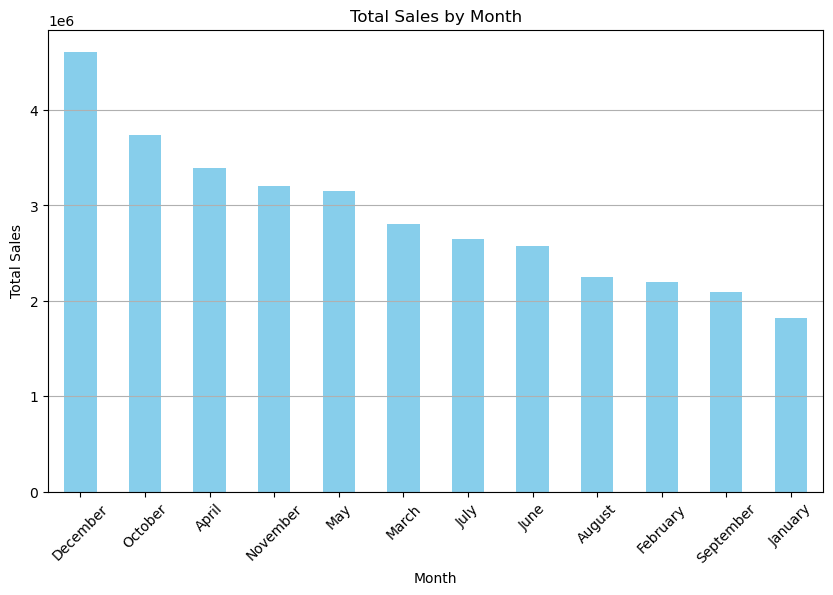

In [32]:
plt.figure(figsize=(10, 6))
sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Which city has most sales?

In [33]:
df['City'] = df['Purchase Address'].apply(lambda x:f"{x.split(',')[1]}, ({x.split(',')[2][1:3]})")
df['City']

0                 Dallas, (TX)
2                 Boston, (MA)
3            Los Angeles, (CA)
4            Los Angeles, (CA)
5            Los Angeles, (CA)
                  ...         
186845       Los Angeles, (CA)
186846     San Francisco, (CA)
186847     San Francisco, (CA)
186848     San Francisco, (CA)
186849     San Francisco, (CA)
Name: City, Length: 185950, dtype: object

In [34]:
city_sales = df.groupby('City')['Total sales'].sum()
city_sales

City
 Atlanta, (GA)          2795498.58
 Austin, (TX)           1819581.75
 Boston, (MA)           3661642.01
 Dallas, (TX)           2767975.40
 Los Angeles, (CA)      5452570.80
 New York City, (NY)    4664317.43
 Portland, (ME)          449758.27
 Portland, (OR)         1870732.34
 San Francisco, (CA)    8262203.91
 Seattle, (WA)          2747755.48
Name: Total sales, dtype: float64

Which city has the most sales

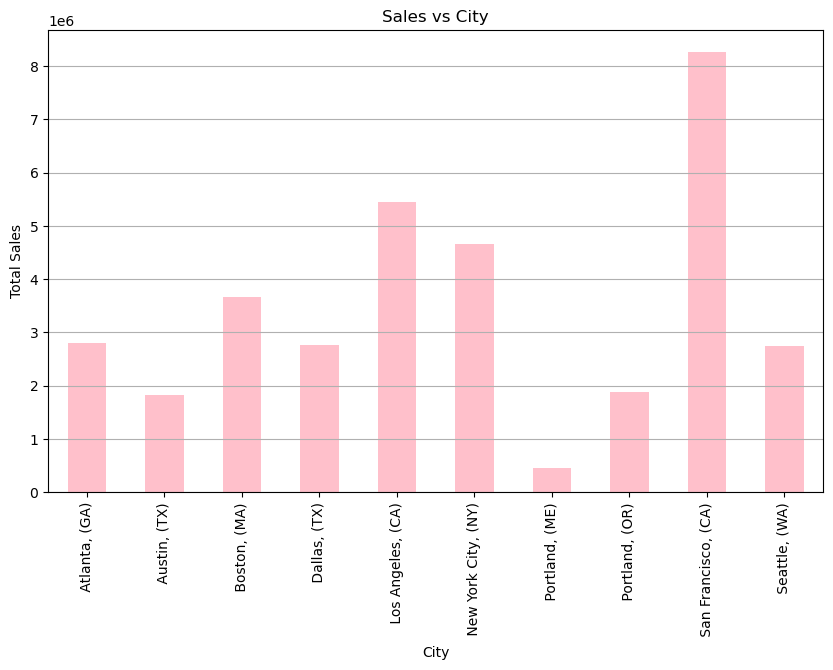

In [37]:
plt.figure(figsize=(10, 6))
city_sales.plot(kind='bar', color='pink')
plt.title('Sales vs City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

In [127]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,"Dallas, (TX)"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,"Boston, (MA)"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,"Los Angeles, (CA)"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,"Los Angeles, (CA)"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,"Los Angeles, (CA)"


What is the best time for advertising?

In [41]:
df['Hour'] = df['Order Date'].dt.hour
df['Min'] = df['Order Date'].dt.minute

In [42]:
hour = df.groupby('Hour').count()

<function matplotlib.pyplot.show(close=None, block=None)>

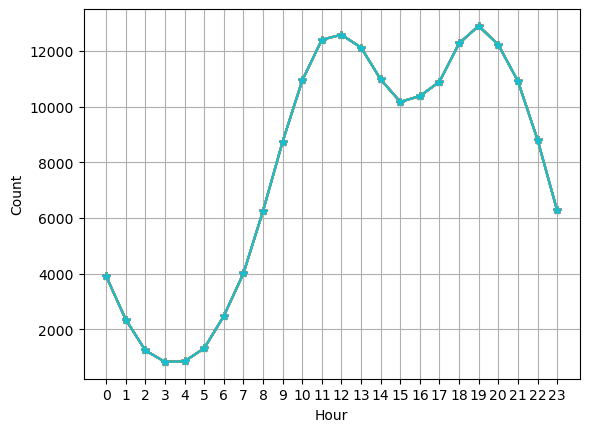

In [43]:
plt.plot(hour.index, hour.values, marker='*', linestyle='-')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(hour.index)
plt.grid()
plt.show


In [40]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total sales,City,Hour,Min
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,23.90,"Dallas, TX 75001",8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,99.99,"Boston, MA 02215",22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,"Los Angeles, CA 90001",14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,"Los Angeles, CA 90001",14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,11.99,"Los Angeles, CA 90001",9,27


In [46]:
df = df[df["Order ID"].duplicated(keep = False)]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total sales,City,Hour,Min
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,"Los Angeles, CA 90001",14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,"Los Angeles, CA 90001",14,38
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,600.00,"Los Angeles, CA 90001",19,42
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,11.95,"Los Angeles, CA 90001",19,42
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",April,99.99,"Boston, MA 02215",11,31
...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",September,3.84,"Atlanta, GA 30301",20,18
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",September,11.99,"Atlanta, GA 30301",0,25
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",September,5.98,"Atlanta, GA 30301",0,25
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",September,600.00,"San Francisco, CA 94016",13,49


In [50]:
df['Order_grouped'] = df.groupby('Order ID')["Product"].transform(lambda x: ','.join(x))
df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total sales,City,Hour,Min,Order_grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,600.00,"Los Angeles, CA 90001",14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,11.99,"Los Angeles, CA 90001",14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,600.00,"Los Angeles, CA 90001",19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",April,11.95,"Los Angeles, CA 90001",19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",April,99.99,"Boston, MA 02215",11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [56]:
df = df[['Order ID','Order_grouped']].drop_duplicates()
sold_together =  df[['Order ID','Order_grouped']].drop_duplicates()

In [63]:
from itertools import combinations
from collections import Counter

In [64]:
count = Counter()

Which two items are brought together?

In [78]:
for i in df['Order_grouped']:
    i_list = i.split(',')
    count.update(Counter(combinations(i_list,2)))

count.most_common(10)

for k,v in count.most_common(10):
    print(f'{k}-{v}')
                 
    

('iPhone', 'Lightning Charging Cable')-8040
('Google Phone', 'USB-C Charging Cable')-7896
('iPhone', 'Wired Headphones')-3576
('Google Phone', 'Wired Headphones')-3312
('Vareebadd Phone', 'USB-C Charging Cable')-2888
('iPhone', 'Apple Airpods Headphones')-2880
('Google Phone', 'Bose SoundSport Headphones')-1760
('USB-C Charging Cable', 'Wired Headphones')-1280
('Vareebadd Phone', 'Wired Headphones')-1144
('Lightning Charging Cable', 'Wired Headphones')-736
